In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets/Clustering

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets/Clustering


In [ ]:
%ls

customer-seg.csv  OnlineRetail.csv


In [ ]:
import pandas as pd

# Load the dataset
customer_data = pd.read_csv("customer-seg.csv")

# Display the first few rows of the dataset to understand its structure
customer_data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


# Pre processing data

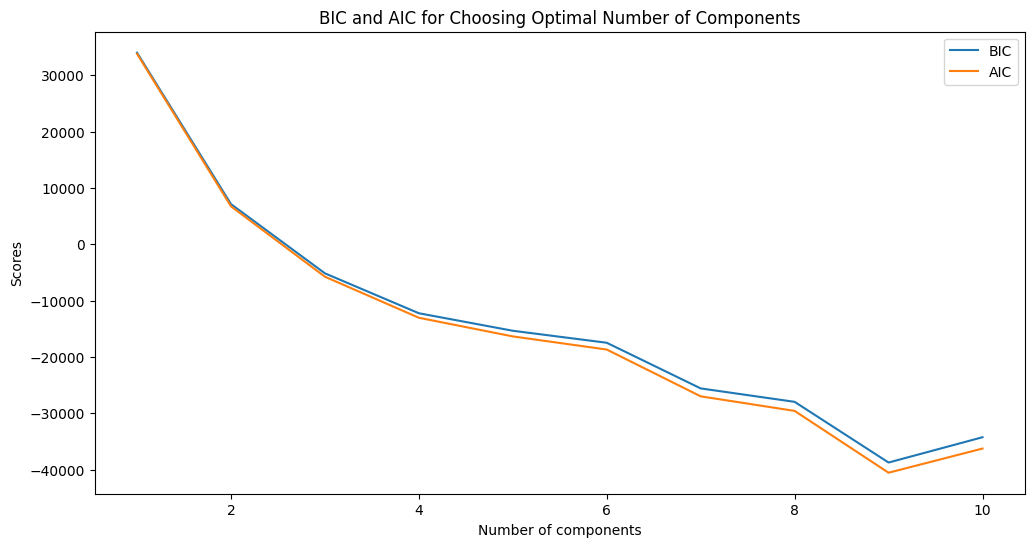

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Dropping the ID column as it's not useful for clustering
data_clustering = customer_data.drop('ID', axis=1)

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

# Finding the optimal number of clusters using BIC and AIC
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data_scaled) for n in n_components]

bic = [m.bic(data_scaled) for m in models]
aic = [m.aic(data_scaled) for m in models]

# Plotting the BIC and AIC values
plt.figure(figsize=(12, 6))
plt.plot(n_components, bic, label='BIC')
plt.plot(n_components, aic, label='AIC')
plt.legend(loc='best')
plt.xlabel('Number of components')
plt.ylabel('Scores')
plt.title('BIC and AIC for Choosing Optimal Number of Components')
plt.show()

The plot of Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC) against the number of components (clusters) helps us choose the optimal number of clusters for the Gaussian Mixture Model (GMM). Both BIC and AIC tend to decrease with more clusters, but we should look for a point where the decrease in these scores starts to plateau, indicating a balance between model complexity and goodness of fit.

Based on the plot, we can choose an appropriate number of clusters. In the plot, both BIC and AIC values show a notable decrease up to around 4 or 5 clusters, after which the rate of decrease slows down significantly. Choosing either 4 or 5 clusters seems reasonable here.

# Clustering

The Gaussian Mixture Model (GMM) clustering has been applied to the dataset, and each customer has been assigned to one of five clusters (labeled as 0 to 4). These clusters are now part of the dataset in the 'Cluster' column.

In [ ]:
# Performing GMM clustering with 5 clusters
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=0)
gmm.fit(data_scaled)

# Predicting the cluster labels
cluster_labels = gmm.predict(data_scaled)

# Adding the cluster labels to the original dataset for analysis
data_with_clusters = data_clustering.copy()
data_with_clusters['Cluster'] = cluster_labels

# Displaying the first few rows of the dataset with cluster labels
data_with_clusters.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,0,0,67,2,124670,1,2,3
1,1,1,22,1,150773,1,2,2
2,0,0,49,1,89210,0,0,0
3,0,0,45,1,171565,1,1,3
4,0,0,53,1,149031,1,1,3


In [ ]:
# Analyzing the characteristics of each cluster
cluster_summary = data_with_clusters.groupby('Cluster').mean()
cluster_summary

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Cluster,,,,,,,
0,0.000000,0.000000,36.490909,0.693506,105342.090909,0.605195,0.244156
1,1.000000,0.345238,40.436508,1.305556,100456.912698,0.305556,0.000000
2,0.742063,1.000000,27.990741,1.000000,111075.636243,0.767196,0.603175
3,0.000000,0.000000,41.335586,0.873874,150004.891892,1.207207,1.612613
4,0.619632,0.920245,49.478528,2.061350,156206.368098,1.196319,1.300613


The clustering has resulted in five distinct customer segments, each with its unique characteristics based on the mean values of their features. Here's a summary of each cluster:

    Cluster 0
        Gender: Predominantly Male (Sex = 0)
        Marital Status: Predominantly Single (Marital status = 0)
        Average Age: Approximately 36 years
        Education Level: Lower (Education ≈ 0.69)
        Average Income: About 105,342
        Occupation: Mid-range (Occupation ≈ 0.61)
        Settlement Size: Smaller (Settlement size ≈ 0.24)

    Cluster 1
        Gender: Exclusively Female (Sex = 1)
        Marital Status: Mixed, slightly more Single (Marital status ≈ 0.35)
        Average Age: Approximately 40 years
        Education Level: Medium (Education ≈ 1.31)
        Average Income: About 100,457
        Occupation: Lower range (Occupation ≈ 0.31)
        Settlement Size: Smallest (Settlement size = 0)

    Cluster 2
        Gender: Mostly Female (Sex ≈ 0.74)
        Marital Status: Predominantly Married (Marital status = 1)
        Average Age: Approximately 28 years
        Education Level: Standard (Education = 1)
        Average Income: About 111,076
        Occupation: Mid to high range (Occupation ≈ 0.77)
        Settlement Size: Medium (Settlement size ≈ 0.60)

    Cluster 3
        Gender: Predominantly Male (Sex = 0)
        Marital Status: Predominantly Single (Marital status = 0)
        Average Age: Approximately 41 years
        Education Level: Lower to medium (Education ≈ 0.87)
        Average Income: Higher, about 150,005
        Occupation: Higher range (Occupation ≈ 1.21)
        Settlement Size: Larger (Settlement size ≈ 1.61)

    Cluster 4
        Gender: Mixed, slightly more Female (Sex ≈ 0.62)
        Marital Status: Mostly Married (Marital status ≈ 0.92)
        Average Age: Approximately 49 years
        Education Level: Higher (Education ≈ 2.06)
        Average Income: Highest, about 156,206
        Occupation: Higher range (Occupation ≈ 1.20)
        Settlement Size: Large (Settlement size ≈ 1.30)